<a href="https://colab.research.google.com/github/Iztund/portfolio/blob/main/NLP_with_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.preprocessing import sequence
import tensorflow as tf
import os
import numpy as np
import keras
VOCAB_SIZE = 88584

MAXLEN =250
BATCH_SIZE = 64

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = VOCAB_SIZE)


17464789/17464789 [==============================] - 1s 0us/step


In [ ]:
# LETS LOOK AT ONE REVIEW
len(train_data[7])

562

In [ ]:
train_data =keras.utils.pad_sequences(train_data, MAXLEN)
test_data = keras.utils.pad_sequences(test_data, MAXLEN)
len(test_data)
len(train_data)

25000

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(
        VOCAB_SIZE,32),
        # Use masking to handle the variable sequence length
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(1, activation='relu'),
])

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          2834688   
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 2,843,041
Trainable params: 2,843,041
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

history = model.fit(train_data, train_labels, epochs=8, validation_split=0.2)

Epoch 1/8
625/625 [==============================] - 15s 13ms/step - loss: 0.6554 - accuracy: 0.6810 - val_loss: 0.5224 - val_accuracy: 0.7412
Epoch 2/8
625/625 [==============================] - 8s 13ms/step - loss: 0.4755 - accuracy: 0.7954 - val_loss: 0.5806 - val_accuracy: 0.6962
Epoch 3/8
625/625 [==============================] - 8s 12ms/step - loss: 0.3370 - accuracy: 0.8850 - val_loss: 0.5189 - val_accuracy: 0.8400
Epoch 4/8
625/625 [==============================] - 8s 12ms/step - loss: 0.2066 - accuracy: 0.9417 - val_loss: 0.6676 - val_accuracy: 0.8508
Epoch 5/8
625/625 [==============================] - 8s 12ms/step - loss: 0.1927 - accuracy: 0.9452 - val_loss: 0.8066 - val_accuracy: 0.8396
Epoch 6/8
625/625 [==============================] - 8s 12ms/step - loss: 0.1205 - accuracy: 0.9734 - val_loss: 0.9510 - val_accuracy: 0.8394
Epoch 7/8
625/625 [==============================] - 8s 12ms/step - loss: 0.0956 - accuracy: 0.9811 - val_loss: 1.0679 - val_accuracy: 0.8388
Epoch

In [ ]:
test_loss, test_acc = model.evaluate(test_data,test_labels)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

782/782 [==============================] - 4s 6ms/step - loss: 1.3857 - accuracy: 0.8419
Test Loss: 1.3857182264328003
Test Accuracy: 0.841920018196106


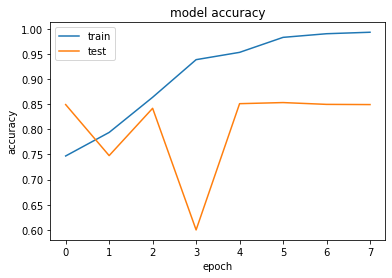

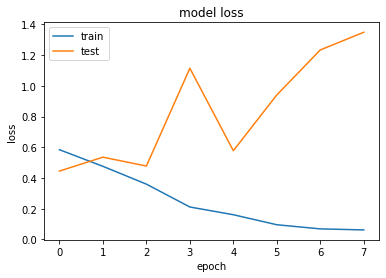

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

(0.0, 1.412390672788024)

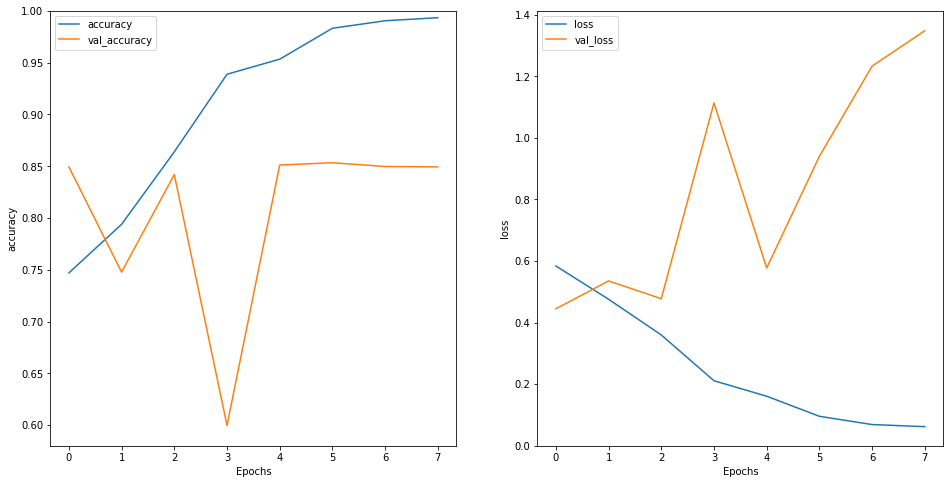

In [ ]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)

In [ ]:
word_index = imdb.get_word_index()

def encode_text(text):
  tokens = keras.preprocessing.text.text_to_word_sequence(text)
  tokens = [word_index[word] if word in word_index else 0 for word in tokens]
  return keras.utils.pad_sequences([tokens],MAXLEN)[0]

text=input("Enter a Review")
encoded = encode_text(text)
print(encoded)


1641221/1641221 [==============================] - 0s 0us/step
Enter a Reviewwhat a fine movie
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0 

In [ ]:
#decoding function

reverse_word_index = {value: key for (key, value) in word_index.items()}

def decode_integers(integers):
  PAD =0
  text = ""
  for num in integers:
    if num != PAD:
      text += reverse_word_index[num] + " "

  return text[:-1]
decode_integers(encoded)

'what a fine movie'

In [ ]:
# making prediction
review=input("Enter a review: ")
def predict(text):
  encoded_text = encode_text(text)
  pred = np.zeros((1,250))
  pred[0] = encoded_text
  result = model.predict(pred)
  print(result[0])
  m=float(result[0])
  if m>=0.5:
    print("this is a positive review")
  else:
    print("this is a negative review")

predict(review)

Enter a review: what a nice movie
1/1 [==============================] - 0s 19ms/step
[0.]
this is a negative review


In [ ]:
review=input("enter a review")
def testpredict(tem):
  if float(predict(tem))>=0.5:
    print("this is a positve review")
  else:
    print("this is a negative review")
testpredict(review)


enter a reviewwhat a bad movie
1/1 [==============================] - 0s 18ms/step
[0.]


TypeError: ignored